In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [4]:
df = load_images_from_folder('./data/train/')

In [14]:
labels = pd.read_csv('./data/trainLabels.csv')
y = labels['label']

In [15]:
df[0].shape

(32, 32, 3)

'truck'

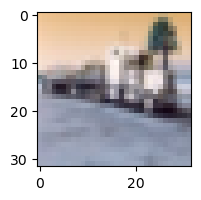

In [20]:
plt.figure(figsize=(15,2))
plt.imshow(df[1])
y[1]

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

LabelEncoder()

In [24]:
y_encoded = le.transform(y)
y_encoded

array([6, 9, 9, ..., 9, 1, 1])

In [26]:
y_encoded[1]

9

In [30]:
le.inverse_transform([y_encoded[0]])

array(['frog'], dtype=object)

In [44]:
import numpy as np
df = np.array(df)

In [45]:
df = df / 255

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(df,y_encoded, test_size=0.2)

array(['airplane'], dtype=object)

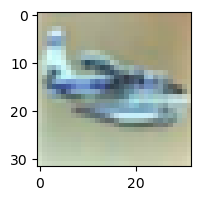

In [49]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[1])
le.inverse_transform([y_train[1]])

In [57]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(1000),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(100),
    keras.layers.LeakyReLU(alpha=0.5),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
) 
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1250/1250 [==============================] - 20s 16ms/step - loss: 2.7092 - accuracy: 0.1012
Epoch 2/5
1250/1250 [==============================] - 21s 17ms/step - loss: 2.3912 - accuracy: 0.1002
Epoch 3/5
1250/1250 [==============================] - 21s 17ms/step - loss: 7.6128 - accuracy: 0.0980
Epoch 4/5
1250/1250 [==============================] - 20s 16ms/step - loss: 2.3400 - accuracy: 0.1040
Epoch 5/5
1250/1250 [==============================] - 19s 15ms/step - loss: 2.3574 - accuracy: 0.1009


In [64]:
from tensorflow import keras

cnn = keras.Sequential([
    # cnn
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    # dense
    keras.layers.Flatten(),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
cnn.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
) 
cnn.fit(x_train,y_train, epochs=5)

Epoch 1/5
1250/1250 [==============================] - 8s 6ms/step - loss: 2.3039 - accuracy: 0.0981
Epoch 2/5
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3029 - accuracy: 0.0983
Epoch 3/5
1250/1250 [==============================] - 8s 6ms/step - loss: 2.3033 - accuracy: 0.0984
Epoch 4/5
1250/1250 [==============================] - 9s 7ms/step - loss: 2.3030 - accuracy: 0.1001
Epoch 5/5
1250/1250 [==============================] - 9s 7ms/step - loss: 2.3030 - accuracy: 0.0995


In [62]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 2.3033 - accuracy: 0.1018


[2.303321599960327, 0.10180000215768814]

In [67]:
# CNN model, with 6 convolutional layers, 3 pooling layers, and 3 dense layers. Softmax output layer.
model = models.Sequential()

model.add(layers.Conv2D(64, (5,5), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        4864      
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                

In [68]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
) 
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1250/1250 [==============================] - 38s 30ms/step - loss: 2.3032 - accuracy: 0.1001
Epoch 2/5
1250/1250 [==============================] - 37s 30ms/step - loss: 2.3029 - accuracy: 0.0976
Epoch 3/5
1250/1250 [==============================] - 39s 31ms/step - loss: 2.3029 - accuracy: 0.0971
Epoch 4/5
1250/1250 [==============================] - 38s 30ms/step - loss: 2.3029 - accuracy: 0.0963
Epoch 5/5
1250/1250 [==============================] - 38s 31ms/step - loss: 2.3029 - accuracy: 0.0986


 <h4 style='color:green;font-size:20px'>  Tensorflow flower images classification <h4>

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='./data/', untar=True)

In [9]:
data_dir

'./data/datasets/flower_photos'

In [10]:
import pathlib
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


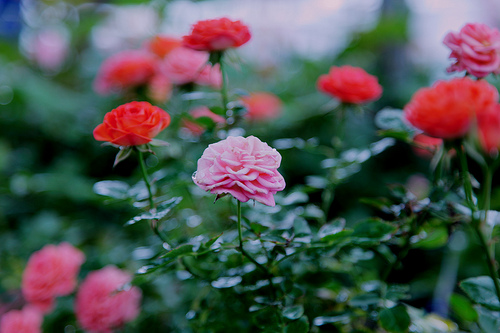

In [11]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

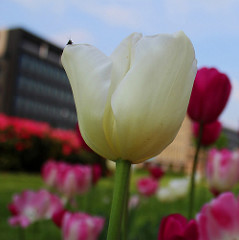

In [12]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [13]:
flower_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [14]:
flower_images_label_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [80]:
flower_images_dict['roses']

[PosixPath('data/datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('data/datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('data/datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('data/datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('data/datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('data/datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
 PosixPath('data/datasets/flower_photos/roses/6803363808_9f9ce98186_m.jpg'),
 PosixPath('data/datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('data/datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('data/datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('data/datasets/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
 PosixPath('data/datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('data/datasets/flower_photos/roses/18599603859_f2ec616ddf_n.jpg'),
 Po

In [82]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(243, 500, 3)

In [84]:
img2 = cv2.resize(img,(180,180))
img2.shape

(180, 180, 3)

In [90]:
x,y = [],[]

for  flower, images in flower_images_dict.items():
    for img in images:
        image = cv2.imread(str(img))
        resize_image = cv2.resize(image,(180,180))
        if image is not None:
            x.append(resize_image)
            y.append(flower_images_label_dict[flower])

In [91]:
y[:5]

[0, 0, 0, 0, 0]

In [93]:
x[:5]

[array([[[  2,   0,   2],
         [ 10,   5,   1],
         [ 89,  85,  97],
         ...,
         [244, 245, 243],
         [244, 245, 243],
         [244, 245, 243]],
 
        [[ 14,  33,  73],
         [  6,   1,   2],
         [ 92,  90, 105],
         ...,
         [243, 244, 242],
         [244, 245, 243],
         [243, 244, 242]],
 
        [[122, 176, 224],
         [ 10,   1,   2],
         [ 72,  80,  84],
         ...,
         [244, 245, 243],
         [244, 245, 243],
         [244, 245, 243]],
 
        ...,
 
        [[147, 109,  85],
         [145, 109,  85],
         [144, 108,  84],
         ...,
         [155, 122,  96],
         [152, 121,  95],
         [149, 118,  93]],
 
        [[148, 114,  91],
         [154, 120,  96],
         [146, 112,  88],
         ...,
         [155, 125,  98],
         [153, 121,  95],
         [152, 122,  93]],
 
        [[153, 119,  96],
         [151, 117,  93],
         [152, 117,  94],
         ...,
         [154, 124,  97],
  

In [94]:
x = np.array(x)
y = np.array(y)

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=5)

In [97]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [98]:
x_train_scaled[0]

array([[[0.01568627, 0.04705882, 0.04705882],
        [0.01568627, 0.04705882, 0.04705882],
        [0.01176471, 0.04313725, 0.04313725],
        ...,
        [0.00784314, 0.16078431, 0.10196078],
        [0.00392157, 0.15294118, 0.09411765],
        [0.00392157, 0.1372549 , 0.08235294]],

       [[0.01568627, 0.04705882, 0.04705882],
        [0.01568627, 0.04705882, 0.04705882],
        [0.00784314, 0.04313725, 0.04313725],
        ...,
        [0.00392157, 0.16078431, 0.10196078],
        [0.00392157, 0.15294118, 0.09411765],
        [0.        , 0.1372549 , 0.08235294]],

       [[0.01568627, 0.04705882, 0.04705882],
        [0.01176471, 0.04705882, 0.04705882],
        [0.00784314, 0.04705882, 0.04705882],
        ...,
        [0.00392157, 0.16078431, 0.10196078],
        [0.00392157, 0.15294118, 0.09411765],
        [0.        , 0.14117647, 0.08627451]],

       ...,

       [[0.01176471, 0.07058824, 0.05490196],
        [0.00784314, 0.06666667, 0.05098039],
        [0.01176471, 0

In [100]:
from tensorflow.keras import datasets, layers, models

In [103]:
model = keras.Sequential([
    # 16 filters 3x3 window
    keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    
    # nn
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


model.fit(x_train_scaled, y_train, epochs = 10)



Epoch 1/10
92/92 [==============================] - 7s 65ms/step - loss: 1.4810 - accuracy: 0.4227
Epoch 2/10
92/92 [==============================] - 6s 60ms/step - loss: 1.0582 - accuracy: 0.5896
Epoch 3/10
92/92 [==============================] - 5s 59ms/step - loss: 0.8531 - accuracy: 0.6792
Epoch 4/10
92/92 [==============================] - 5s 60ms/step - loss: 0.7379 - accuracy: 0.7313
Epoch 5/10
92/92 [==============================] - 5s 59ms/step - loss: 0.8112 - accuracy: 0.7548
Epoch 6/10
92/92 [==============================] - 6s 61ms/step - loss: 0.5261 - accuracy: 0.8181
Epoch 7/10
92/92 [==============================] - 6s 61ms/step - loss: 0.3854 - accuracy: 0.8818
Epoch 8/10
92/92 [==============================] - 6s 60ms/step - loss: 0.7268 - accuracy: 0.8219
Epoch 9/10
92/92 [==============================] - 6s 63ms/step - loss: 0.2820 - accuracy: 0.9240
Epoch 10/10
92/92 [==============================] - 5s 60ms/step - loss: 0.6271 - accuracy: 0.8699


In [104]:
model.evaluate(x_test_scaled,y_test)

23/23 [==============================] - 1s 26ms/step - loss: 3.4818 - accuracy: 0.5777


[3.481809139251709, 0.5776566863059998]

### Data augmentation

In [123]:
data_augmantation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(180,180,3))
])

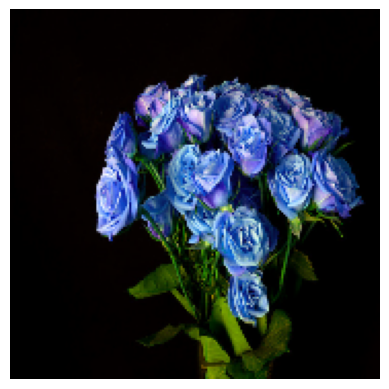

In [124]:
plt.axis('off')
plt.imshow(x[15])

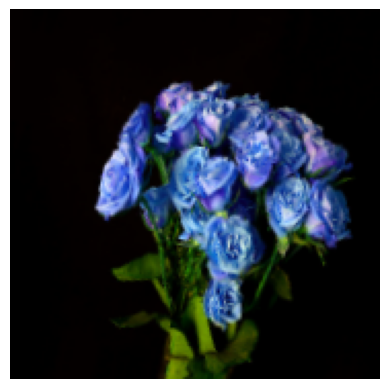

In [125]:
plt.axis('off')
plt.imshow(data_augmantation(x)[15].numpy().astype('uint8'))

In [132]:
model = keras.Sequential([
    # data augmentation
    data_augmantation,
    
    # 16 filters 3x3 window
    keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    
    # nn
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


model.fit(x_train_scaled, y_train, epochs = 20)



Epoch 1/20
92/92 [==============================] - 15s 96ms/step - loss: 1.5267 - accuracy: 0.3675
Epoch 2/20
92/92 [==============================] - 8s 86ms/step - loss: 1.1308 - accuracy: 0.5364
Epoch 3/20
92/92 [==============================] - 9s 95ms/step - loss: 1.0592 - accuracy: 0.5783
Epoch 4/20
92/92 [==============================] - 9s 102ms/step - loss: 1.1109 - accuracy: 0.5736
Epoch 5/20
92/92 [==============================] - 8s 90ms/step - loss: 1.1870 - accuracy: 0.5399
Epoch 6/20
92/92 [==============================] - 12s 128ms/step - loss: 1.1989 - accuracy: 0.5579
Epoch 7/20
92/92 [==============================] - 10s 109ms/step - loss: 1.1479 - accuracy: 0.5848
Epoch 8/20
92/92 [==============================] - 10s 110ms/step - loss: 1.3018 - accuracy: 0.5691
Epoch 9/20
92/92 [==============================] - 10s 106ms/step - loss: 1.4077 - accuracy: 0.5705
Epoch 10/20
92/92 [==============================] - 9s 96ms/step - loss: 2.7068 - accuracy: 0.4792

In [131]:
model.evaluate(x_test_scaled,y_test)

23/23 [==============================] - 1s 30ms/step - loss: 5697.1753 - accuracy: 0.4564


[5697.17529296875, 0.4564032554626465]

### Apply Google models

In [2]:
import tensorflow as tf

In [19]:
# This gives the whole model
import tensorflow_hub as hub
IMAGE_SHAPE = (224,224)
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [17]:
x,y = [],[]

for  flower, images in flower_images_dict.items():
    for img in images:
        image = cv2.imread(str(img))
        resize_image = cv2.resize(image,(224,224))
        if image is not None:
            x.append(resize_image)
            y.append(flower_images_label_dict[flower])

In [18]:
x = np.array(x)
y = np.array(y)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=5)

x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [20]:
# This model is the one we can change according to our data
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", input_shape=(224,224,3),
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(5, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [21]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_scaled, y_train, epochs = 5)

Epoch 1/5


2023-07-14 14:06:22.085698: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


92/92 [==============================] - 40s 394ms/step - loss: 0.7820 - accuracy: 0.7054
Epoch 2/5
92/92 [==============================] - 35s 385ms/step - loss: 0.3970 - accuracy: 0.8692
Epoch 3/5
92/92 [==============================] - 40s 435ms/step - loss: 0.3123 - accuracy: 0.9002
Epoch 4/5
92/92 [==============================] - 39s 422ms/step - loss: 0.2655 - accuracy: 0.9176
Epoch 5/5
92/92 [==============================] - 37s 403ms/step - loss: 0.2259 - accuracy: 0.9377


In [22]:
model.evaluate(x_test_scaled,y_test)

23/23 [==============================] - 11s 461ms/step - loss: 0.3528 - accuracy: 0.8706


[0.3528456389904022, 0.8705722093582153]